<a href="https://colab.research.google.com/github/IoT-b/Python-project-/blob/main/laptop_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
md=pd.read_csv('/content/laptopData.csv')

In [ ]:
md.head(3)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000


In [ ]:
md.drop('Unnamed: 0',axis=1,inplace=True)

In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   object 
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   object 
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   object 
 10  Price             1273 non-null   float64
dtypes: float64(1), object(10)
memory usage: 112.1+ KB


In [ ]:
md.shape

(1303, 11)

In [ ]:
md['Ram']=md['Ram'].astype(str)
md['Ram']=md['Ram'].str.replace('GB','')
md['Ram']=pd.to_numeric(md['Ram'],errors='coerce')

In [ ]:
md['Inches']=pd.to_numeric(md['Inches'],errors='coerce')

In [ ]:
md['Weight']=md['Weight'].str.replace('kg','')
md['Weight']=pd.to_numeric(md['Weight'],errors='coerce')
md.head()


,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [ ]:
md.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1272 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   float64
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1272 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(4), object(7)
memory usage: 112.1+ KB


In [ ]:
md['Resolution'] = md['ScreenResolution'].astype(str).str.extract(r'(\d+x\d+)')

In [ ]:
md['Cpu_Brand'] = md['Cpu'].astype(str).apply(lambda x: x.split()[0])

In [ ]:
md['Gpu_Brand'] = md['Gpu'].astype(str).apply(lambda x: x.split()[0])

In [ ]:
md.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Resolution,Cpu_Brand,Gpu_Brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8.0,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,Intel,Intel
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8.0,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,Intel,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8.0,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,Intel,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16.0,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,Intel,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8.0,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,Intel,Intel


In [ ]:
md.drop(columns=['ScreenResolution','Cpu','Gpu'],inplace=True)

In [ ]:
md.isnull().sum()

,0
Company,30
TypeName,30
Inches,31
Ram,30
Memory,30
OpSys,30
Weight,31
Price,30
Resolution,30
Cpu_Brand,0


In [ ]:
md[md['Company'].isnull()]

,Company,TypeName,Inches,Ram,Memory,OpSys,Weight,Price,Resolution,Cpu_Brand,Gpu_Brand
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
46,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
115,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
209,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
267,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan
336,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nan,nan


In [ ]:
md.dropna(inplace=True)

In [ ]:
md.isnull().sum()

,0
Company,0
TypeName,0
Inches,0
Ram,0
Memory,0
OpSys,0
Weight,0
Price,0
Resolution,0
Cpu_Brand,0


In [ ]:
md.rename(columns={'Ram': 'Ram in GB','Weight':'Weight in KG'}, inplace=True)

In [ ]:
md.describe()

,Inches,Ram in GB,Weight in KG,Price
count,1271.000000,1271.000000,1271.000000,1271.000000
mean,15.132258,8.463415,2.077852,59888.473922
std,1.954530,5.568758,0.808083,37309.185217
min,10.100000,1.000000,0.000200,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.320000,79274.246400
max,35.600000,64.000000,11.100000,324954.720000


In [ ]:
q1=md['Inches'].quantile(0.25)
q3=md['Inches'].quantile(0.75)

In [ ]:
iqr=q3-q1

In [ ]:
iqr

np.float64(1.5999999999999996)

In [ ]:
l_bound=q1-1.5*iqr
u_bound=q3+1.5*iqr

In [ ]:
l_bound

np.float64(11.600000000000001)

In [ ]:
u_bound

np.float64(18.0)

In [ ]:
md['Inches'].unique()

array([13.3, 15.6, 15.4, 14. , 12. , 17.3, 13.5, 12.5, 13. , 18.4, 13.9,
       11.6, 25.6, 35.6, 12.3, 27.3, 24. , 33.5, 31.6, 17. , 15. , 14.1,
       11.3, 10.1])

<Axes: ylabel='Inches'>

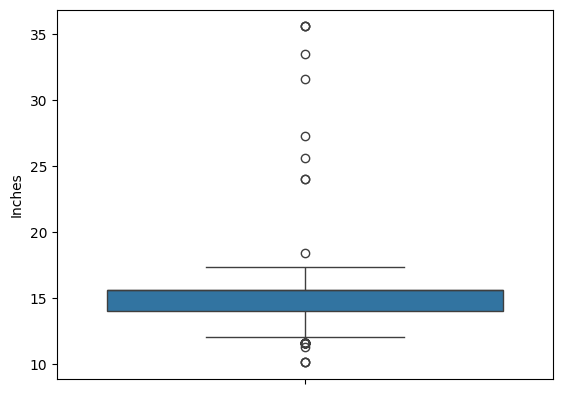

In [ ]:
sns.boxplot(md['Inches'])

In [ ]:
outliers = (md['Inches'] < l_bound) | (md['Inches'] > u_bound)
mean_val = md.loc[~outliers, 'Inches'].mean()
md.loc[outliers, 'Inches'] = mean_val

<Axes: ylabel='Inches'>

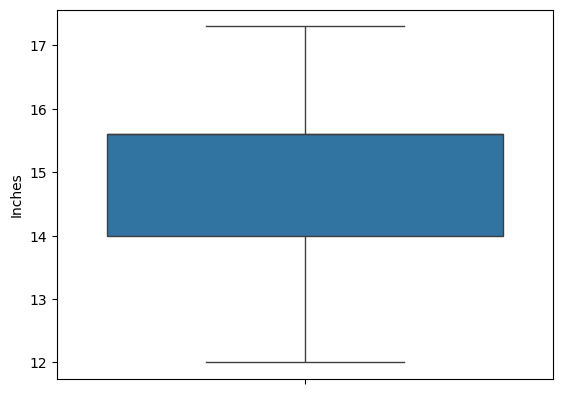

In [ ]:
sns.boxplot(md['Inches'])

In [ ]:
md['Ram in GB'].unique()

array([ 8., 16.,  4.,  2., 12., 64.,  6., 32., 24.,  1.])

<Axes: ylabel='Ram in GB'>

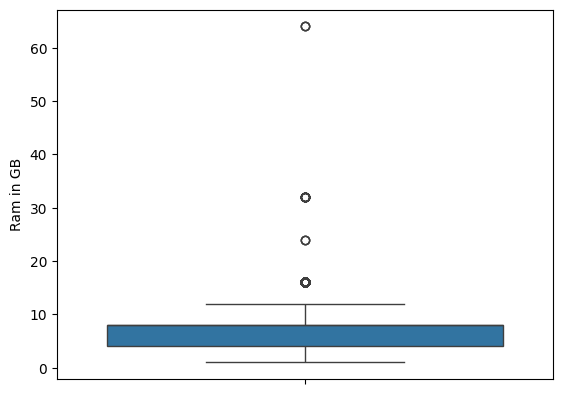

In [ ]:
sns.boxplot(md['Ram in GB'])

In [ ]:
  q1=md['Ram in GB'].quantile(0.25)
q3=md['Ram in GB'].quantile(0.75)

In [ ]:
iqr=q3-q1

In [ ]:
iqr

np.float64(4.0)

In [ ]:
lb=q1-1.5*iqr
ub=q3+1.5*iqr

In [ ]:
lb

np.float64(-2.0)

In [ ]:
ub

np.float64(14.0)

<Axes: ylabel='Weight in KG'>

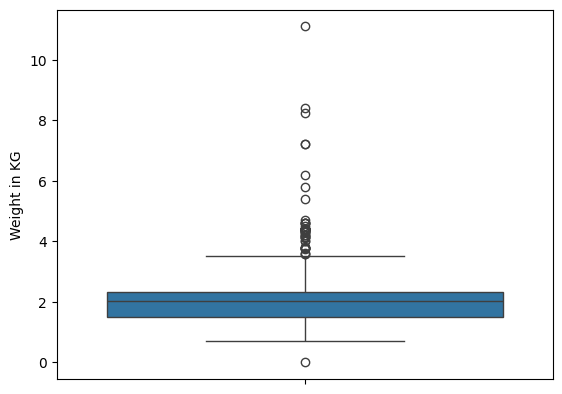

In [ ]:
sns.boxplot(md['Weight in KG'])

In [ ]:
Q1 = md['Weight in KG'].quantile(0.25)
Q3 = md['Weight in KG'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
lower_bound

np.float64(0.27000000000000024)

In [ ]:
upper_bound

np.float64(3.55)

In [ ]:
med_w = md['Weight in KG'].median()


In [ ]:
md.loc[
    (md['Weight in KG'] < lower_bound) |
    (md['Weight in KG'] > upper_bound),
    'Weight in KG'
] = med_w

In [ ]:
md.describe()

,Inches,Ram in GB,Weight in KG,Price
count,1271.000000,1271.000000,1271.000000,1271.000000
mean,15.122920,8.463415,1.966727,59888.473922
std,1.280737,5.568758,0.518501,37309.185217
min,12.000000,1.000000,0.690000,9270.720000
25%,14.000000,4.000000,1.500000,31914.720000
50%,15.600000,8.000000,2.040000,52054.560000
75%,15.600000,8.000000,2.275000,79274.246400
max,17.300000,64.000000,3.520000,324954.720000


<Axes: ylabel='Price'>

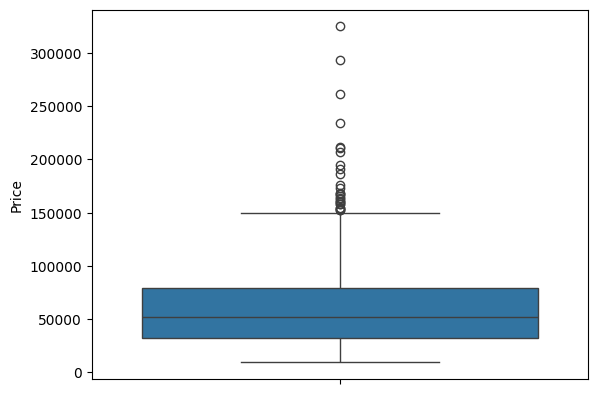

In [ ]:
sns.boxplot(md['Price'])

In [ ]:
Q1 = md['Price'].quantile(0.25)
Q3 = md['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [ ]:
median = md['Price'].median()

In [ ]:
md.loc[(md['Price'] <lower_bound ) | (md['Price'] > upper_bound),'Price'] = median



In [ ]:
md.head(4)

,Company,TypeName,Inches,Ram in GB,Memory,OpSys,Weight in KG,Price,Resolution,Cpu_Brand,Gpu_Brand
0,Apple,Ultrabook,13.3,8.0,128GB SSD,macOS,1.37,71378.6832,2560x1600,Intel,Intel
1,Apple,Ultrabook,13.3,8.0,128GB Flash Storage,macOS,1.34,47895.5232,1440x900,Intel,Intel
2,HP,Notebook,15.6,8.0,256GB SSD,No OS,1.86,30636.0000,1920x1080,Intel,Intel
3,Apple,Ultrabook,15.4,16.0,512GB SSD,macOS,1.83,135195.3360,2880x1800,Intel,AMD


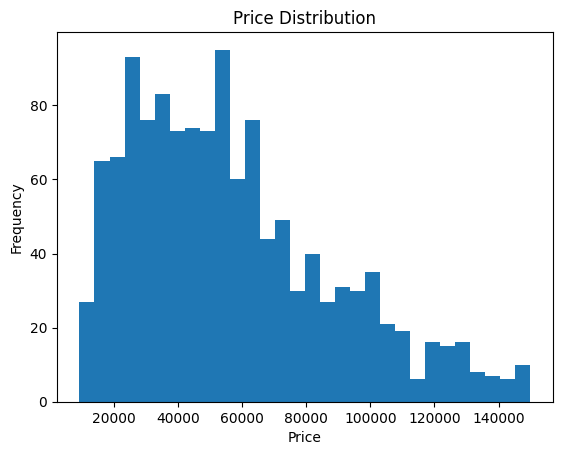

In [ ]:
plt.hist(md['Price'], bins=30)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

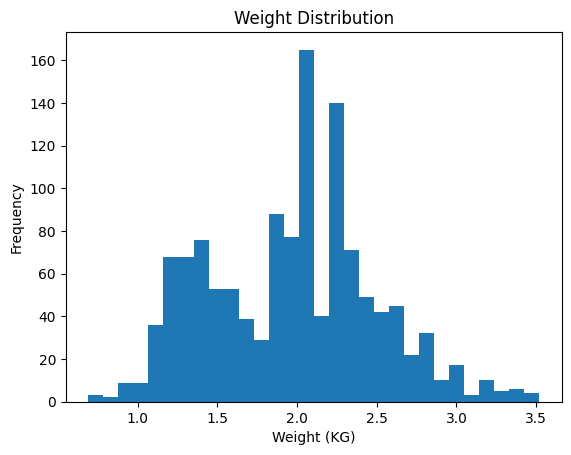

In [ ]:
plt.hist(md['Weight in KG'], bins=30)
plt.title('Weight Distribution')
plt.xlabel('Weight (KG)')
plt.ylabel('Frequency')
plt.show()


In [ ]:
avg_price_ram = md.groupby('Ram in GB', as_index=False)['Price'].mean()
px.bar(avg_price_ram,x='Ram in GB',y='Price',title='Average Price by RAM ',labels={'Price': 'Average Price'})




In [ ]:
import plotly.express as px

brand_count = md['Company'].value_counts().reset_index()
brand_count.columns = ['Company', 'Count']
px.bar(brand_count,x='Company',y='Count',title='Number of Laptops by Brand',)



In [ ]:
avg= md.groupby('Company', as_index=False)['Price'].mean()
px.bar(avg.sort_values('Price'),x='Company',y='Price',title='Average Price by Brand',labels={'Price': 'Average Price'})




In [ ]:
brand_count = md['Company'].value_counts().reset_index()
brand_count.columns = ['Company', 'Count']
px.pie(brand_count,names='Company',values='Count',title='Brand-wise Laptop Distribution')

In [ ]:

from plotly.subplots import make_subplots


brand_count = md['Company'].value_counts().reset_index()
brand_count.columns = ['Company', 'Count']
avg = md.groupby('Company', as_index=False)['Price'].mean().sort_values('Price')


fig = make_subplots(rows=1, cols=2,specs=[[{'type': 'domain'}, {'type': 'xy'}]],subplot_titles=('Brand-wise Laptop Distribution', 'Average Price by Brand'))

fig.add_trace(px.pie(brand_count,names='Company',values='Count').data[0],row=1, col=1)

fig.add_trace(px.bar(avg,x='Company',y='Price').data[0],row=1, col=2)

fig.update_layout(title_text='Laptop Brand Analysis Dashboard',showlegend=True)
fig.update_xaxes(tickangle=-45, row=1, col=2)

fig.show()



 SUMMARY OF PROJECT

1.Collected and loaded the laptop dataset for analysis.

2.Performed data cleaning by fixing data types, removing duplicates, and handling missing values.

3.Detected outliers in numerical columns (Price, Weight, RAM) using the IQR method.

4.Treated outliers by replacing them with the median to preserve all records.

5.Engineered new features such as RAM in GB, Storage in GB, and Screen Resolution.

6.Prepared a clean, model-ready dataset after deep preprocessing.

7.Conducted exploratory data analysis to understand price distribution and hardware trends.

8.Created interactive visualizations using Plotly Express (bar charts, box plots, pie charts).

9.Performed brand-wise analysis to study market share and average pricing.





